# Gradient Descent

In this exercice, you will create the necessary functions to go through the steps of a single Gradient Descent Epoch. You will then combine the necessary functions and create a loop through the entire Gradient Descent procedure.

## 1. Data Exploration

👇 Import the dataset located in the folder

In [1]:
import pandas as pd
data = pd.read_csv('data.csv')

In [2]:
data.head()

,alim_ssgrp_nom_eng,alim_nom_eng,Phosphorus (mg/100g),Protein (g/100g),Zinc (mg/100g)
0,pasta. rice and grains,Durum wheat pre-cooked. whole grain. cooked. u...,116.0,5.25,0.48
1,pasta. rice and grains,Asian noodles. plain. cooked. unsalted,43.0,3.50,0.19
2,pasta. rice and grains,Rice. brown. cooked. unsalted,120.0,3.21,0.62
3,pasta. rice and grains,Rice. cooked. unsalted,35.0,2.92,0.26
4,pasta. rice and grains,Rice. parboiled. cooked. unsalted,35.0,2.95,0.10


👇 Check for missing values

👇 Visualize the relation between the variables `Phosphorus (mg/100g)` and `Zinc (mg/100g)`.

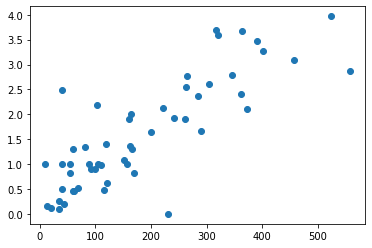

In [3]:
import matplotlib.pyplot as plt
plt.scatter(data['Phosphorus (mg/100g)'], data['Zinc (mg/100g)'])

The visualization should hint at a somewhat Linear relationship between the variables. Let's use Gradient Descent to find the line of best fit between them!

## 2. Data Preprocessing

👇 Before you start, scale the two features with a `MinMaxScaler`. This will allow the Gradient Descent to be more efficient and converge faster. Add the scaled features as new columns in the dataframe.

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# data['Phos_scaled'], data['Prot_scaled'] = scaler.fit_transform(data[['Phosphorus (mg/100g)', 'Protein (g/100g)']])
data['Phos_scaled'] = scaler.fit_transform(data[['Phosphorus (mg/100g)']])
data['Zinc_scaled'] = scaler.fit_transform(data[['Zinc (mg/100g)']])

👇 Create the two `pd.Series` `x` and `y` as `zinc` and `phosphorus` respectively (their scaled version)

In [5]:
zinc = data['Zinc_scaled']
phosphorus = data['Phos_scaled']


## 3. Code one Epoch

In this section of the exercice, you will define the key functions used to update the parameters during one epoch (k) of gradient descent. Recall the formula below

$$
\beta_0^{\color {red}{(k+1)}} = \beta_0^{\color {red}{(k)}} - \eta \frac{\partial L}{\partial \beta_0}(\beta^{\color{red}{(k)}})
$$


$$
\beta_1^{\color {red}{(k+1)}} = \beta_1^{\color {red}{(k)}} - \eta \frac{\partial L}{\partial \beta_1}(\beta^{\color {red}{(k)}})
$$


### Hypothesis Function

$$
\hat{y} =  a x + b
$$

👇 Define the hypothesis function of a Linear Regression. Let `a` be the slope and `b` the intercept.


In [6]:
def h(x,a,b):
    y = a * x + b
    return y

❓ What would be your predicted amount of phosphorus if:
- zinc = 0.1
- a = 1
- b = 1

Use your hypothesis function to compute the answer. 

In [7]:
h(0.1, 1, 1)

1.1

⚠️ If the answer is not `1.1`, something is wrong with your function. Fix it before moving on!

### Loss Function

$$
Least\ Squares\ Loss = \sum_{i=0}^n (y^{(i)} - \hat{y}^{(i)} )^2
$$

👇 Define the Least Squares Loss Function for the above created Hypothesis Function.



<details>
<summary>💡 Hint</summary>
You must use the Hypothesis Function within the Loss function to compute the predictions at given parameter values.
</details>



In [78]:
def loss(x,y,a,b):
    loss = ((y - x.map(lambda x: h(x,a,b)))**2).sum()
    return loss

❓ What would be the total Loss if:
- a = 1 
- b = 1

In [9]:
loss(zinc, phosphorus, 1, 1)

63.868506986115456

⚠️ You should be getting 63.86. If not, something is wrong with your function. Fix it before moving on!

### Gradient

$$
\frac{\partial SSR}{\partial slope}= \sum_{i=0}^n -2(y^{(i)} - \hat{y}^{(i)} )\times x
$$

$$
\frac{\partial SSR}{\partial intercept}= \sum_{i=0}^n -2(y^{(i)} - \hat{y}^{(i)} ) 
$$

👇 Define a function to compute the partial derivatives of the Loss Function for each parameter `a` and `b` at given points.


<details>
<summary>💡 Hint</summary>
Again, you must use the Hypothesis Function within to compute the predictions at given points.
</details>

In [23]:
def gradient(x,y,a,b):
    derivative_a = (-2*(y - x.map(lambda x: h(x,a,b))) * x).sum() 
    derivative_b = (-2*(y - x.map(lambda x: h(x,a,b)))).sum()
    return (derivative_a, derivative_b)

❓ Using your function, what would be the partial derivatives of each parameter if:
- a = 1
- b = 1

In [24]:
gradient(zinc, phosphorus, 1, 1)

(48.459065809109006, 115.17923733301406)

⚠️ You should be getting 48.45 and  115.17. If not, fix your function!

### Step Sizes

$$
step\ size = gradient \cdot learning\ rate
$$

👇 Define a function that calculates the step sizes alongside each parameter (a,b), according to their derivatives (derivative_a, derivative_b) and a learning_rate equals to 0.01 by default

In [25]:
def steps(derivative_a, derivative_b, learning_rate = 0.01):
    step_a = derivative_a*learning_rate
    step_b = derivative_b*learning_rate
    return (step_a, step_b)

❓ What would be the steps to take for the derivatives computed above for (a,b) = (1,1)?

In [26]:
steps(gradient(zinc, phosphorus, 1, 1)[0],gradient(zinc, phosphorus, 1, 1)[1])

(0.4845906580910901, 1.1517923733301405)

⚠️ The steps should be 0.48 for a and 1.15 for b

### Parameter updates

$$
updated\ parameter = old\ parameter\ value - step\ size
$$

👇 Define a function that computes the updated parameter values from the old parameter values and the step sizes.

In [27]:

def update_params(a, b, step_a, step_b):
    updated_a = a - step_a
    updated_b = b - step_b
    return updated_a , updated_b

### Gradient Descent Epoch

👇 Using the functions you just created, compute the updated parameters at the end of the first Epoch, had you started with parameters:
- a = 1
- b = 1

In [28]:
step_a = steps(gradient(zinc, phosphorus, 1, 1)[0],gradient(zinc, phosphorus, 1, 1)[1])[0]
step_b = steps(gradient(zinc, phosphorus, 1, 1)[0],gradient(zinc, phosphorus, 1, 1)[1])[1]
update_params(1, 1, step_a, step_b)

(0.5154093419089099, -0.1517923733301405)

⚠️ You should be getting the following values:
   - updated_a = 0.51
   - updated_b = -0.15

## 4. Gradient Descent

👇 Now that you have the necessary functions for a Gradient Descent, loop through epochs until convergence.

- Initialize parameters `a = 1` and  `b = 1`
- Consider convergence to be **100 epochs**
- Don't forget to start each new epoch with the updated parameters
- Append the value of the loss, a, and b at each epoch to a list called `loss_history`, `a_history` and `b_history`

In [32]:
# Initialize a and b
a, b = 1, 1
loss_history = []
a_history = []
b_history = []
# Loop through steps to perform Gradient Descent
for i in range(100):
    a_history.append(a)
    b_history.append(b)
    # Compute Loss at each Epoch and append to loss_history
    loss_history.append(loss(zinc, phosphorus,a, b)) 
    # Compute the gradient (the two partial derivatives) 
    gradient_a, gradient_b = gradient(zinc, phosphorus,a, b)
    # Compute steps
    step_a, step_b = steps(gradient_a, gradient_b, learning_rate= 0.01)
    # Compute updated parameters
    a, b = update_params(a, b, step_a, step_b)
    # Set updated parameters for new epoch
display(a_history[-1])
display(b_history[-1])

0.7686596499806505

0.007094447489958696

❓ What are the parameter values for `a` and `b` at the end of the 100 epochs?

In [34]:
display(f'a= {a_history[-1]}')
display(f'b= {b_history[-1]}')

'a= 0.7686596499806505'

'b= 0.007094447489958696'

You should be getting 0.76 and 0.007

👇 Wrap this iterative approach into a method `gradient_descent()`

In [101]:
def gradient_descent(x, y, a_init=1, b_init=1, learning_rate=0.001, n_epochs=100):
    a, b = a_init, b_init
    loss_history = []
    a_history = []
    b_history = []
    # Loop through steps to perform Gradient Descent
    for i in range(n_epochs):
        a_history.append(a)
        b_history.append(b)
        # Compute Loss at each Epoch and append to loss_history
        loss_history.append(loss(x, y, a, b)) 
        # Compute the gradient (the two partial derivatives) 
        gradient_a, gradient_b = gradient(x, y, a, b)
        # Compute steps
        step_a, step_b = steps(gradient_a, gradient_b, learning_rate= 0.01)
        # Compute updated parameters
        a, b = update_params(a, b, step_a, step_b)
    history = [loss_history, a_history, b_history]
    return a, b, history

👇 Plot the line of best fit through Zinc and Phosphorus using the parameters of your Gradient Descent.

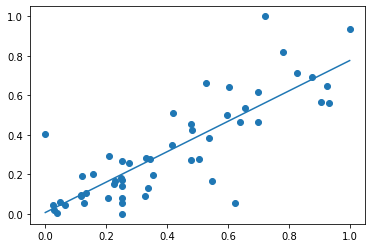

In [102]:
plt.scatter(zinc, phosphorus)
import numpy as np
X = np.linspace(0,1, 2)
a, b = gradient_descent(zinc, phosphorus, a_init=1, b_init=1, learning_rate=0.001, n_epochs=100)[:2]
Y = [b, a+b]
plt.plot(X, Y)

👇 Plot your gradient as a 2D-surface using matplotlib [contourf](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html).  
Plot on the same figure all historical (a,b) points as red dots to visualize your gradient descent!
Change your learning rate and observe it's impact


<details>
    <summary>Hint</summary>

You'll have to create 
- a range of values for `a`
- a range of values for `b`    
- a 2D-array `Z` where each elements `Z[i,j] = loss(x,y,a[i],b[j])`
</details>

In [103]:
history = gradient_descent(zinc, phosphorus, a_init=1, b_init=1, learning_rate=0.001, n_epochs=100)[2]
# A = history[1]
# B = history[2]
A = np.linspace(-1.1,1.1,100)
B = np.linspace(-1.1,1.1,100)
Z = np.empty((len(A), len(B)))
for i in range(len(A)):
    for j in range(len(B)):
        Z[i][j] = loss(zinc, phosphorus, A[i], B[j])


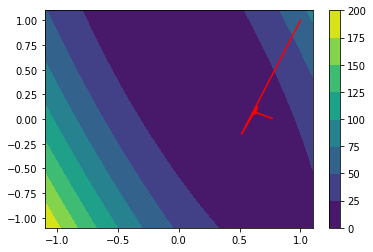

In [135]:
plt.contourf(A, B, Z)
plt.colorbar()
plt.plot(history[1], history[2], color = 'red')

👇 (optional) try also it to visualize your gradient with the interactive plot.ly [3D contour plot](https://plotly.com/python/3d-surface-plots/)

In [105]:
# YOUR CODE HERE

👇 Plot the Loss history as a function of epochs. Vary the learning_rate from 0.001 to 0.01. Notice the difference

In [116]:
loss_history = []
learning_rate = 0.1
epoch_list = [1, 2, 5, 10, 100]
for n in epoch_list:
    loss_history.append(gradient_descent(zinc, phosphorus, a_init=1, b_init=1, learning_rate=learning_rate , n_epochs= n)[2][0][-1])

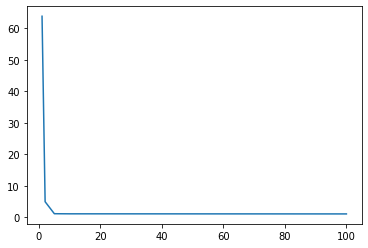

In [117]:
plt.plot(epoch_list, loss_history)

## 7. With Sklearn...

👇 Using Sklearn, train a Linear Regression model on the same data. Compare its parameters to the ones computed by your Gradient Descent.

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(data[['Zinc_scaled']], data['Phos_scaled'], test_size = 0.3 )
model.fit(X_train, y_train)
model.coef_, model.intercept_

(array([0.79276118]), -0.03254756340824516)

They should be almost identical!

### ⚠️ Please, push your exercice when you are done 🙃

# 🏁